# Setup

In [1]:
%pip install lxml html5lib beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn import kernel_ridge
import transfer_data

# Transfer Data

In [3]:
transfer_data.players

,Name,Year Joined,Previous School,Games Played at Previous School,Games Played at GT,Total Games Played,Total Points Scored at Previous School,Total Points Scored at GT,Total Points Scored,Average Points per Game at Previous School,Average Points per Game at GT,Average Points per Game
0,James Banks III F,2018,University of Texas,46,62,108,76,619,695,1.652174,9.983871,6.435185
1,Bubba Parham G,2019,Virginia Military Institute,62,58,120,1125,327,1452,18.145161,5.637931,12.100000
2,Jordan Usher G,2019,University of South Carolina,48,81,129,274,963,1237,5.708333,11.888889,9.589147
3,Kyle Sturdivant G,2020,University of South Carolina,21,94,115,43,647,690,2.047619,6.882979,6.000000
4,Rodney Howard F,2020,University of Georgia,24,70,94,31,342,373,1.291667,4.885714,3.968085
5,Deivon Smith G,2021,Mississippi State University,33,48,81,173,328,501,5.242424,6.833333,6.185185
6,Ja'von Franklin F,2022,University of South Alabama,28,32,60,29,310,339,1.035714,9.687500,5.650000
7,Lance Terry G,2022,Gardner-Webb University,54,29,83,598,294,892,11.074074,10.137931,10.746988


<Axes: xlabel='Games Played at GT', ylabel='Total Points Scored at GT'>

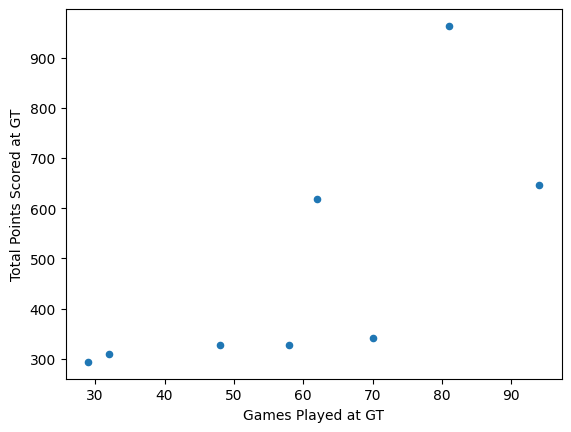

In [4]:
transfer_data.players.plot(kind='scatter', x='Games Played at GT', y='Total Points Scored at GT')

<Axes: xlabel='Games Played at Previous School', ylabel='Total Points Scored at Previous School'>

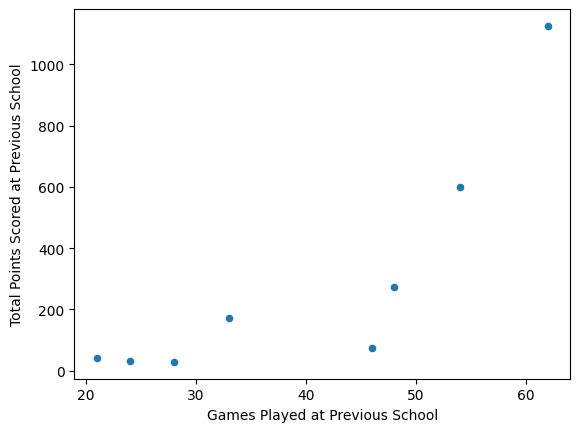

In [5]:
transfer_data.players.plot(kind='scatter', x='Games Played at Previous School', y='Total Points Scored at Previous School')

<Axes: xlabel='Total Games Played', ylabel='Total Points Scored'>

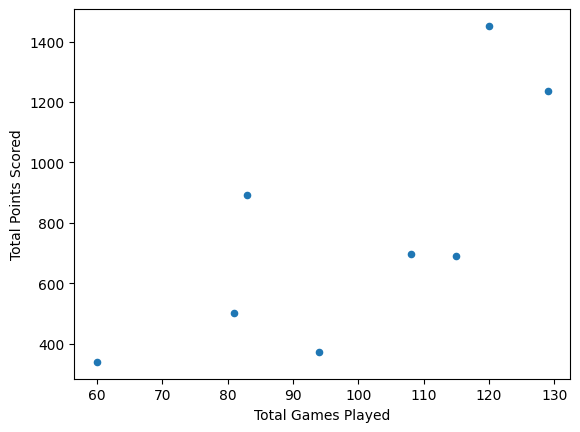

In [6]:
transfer_data.players.plot(kind='scatter', x='Total Games Played', y='Total Points Scored')

<Axes: xlabel='Name'>

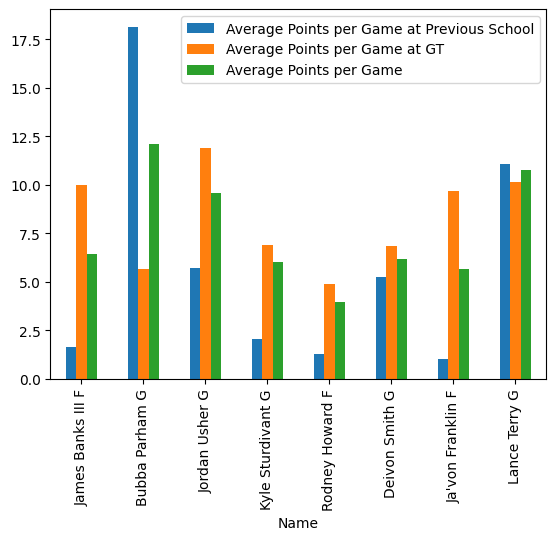

In [7]:
transfer_data.players.plot(kind="bar", x="Name", y=['Average Points per Game at Previous School', 'Average Points per Game at GT', 'Average Points per Game'])

# GT 2023-24 Season Data

In [8]:
url23 = 'https://www.espn.com/mens-college-basketball/team/stats/_/id/59'
gt_stats23 = pd.read_html(url23)
gt_stats23

[                    Name
 0          Miles Kelly G
 1       Dallan Coleman G
 2   Kowacie Reeves Jr. G
 3       Naithan George G
 4      Kyle Sturdivant G
 5       Tyzhaun Claude F
 6         Amaree Abram G
 7          Baye Ndongo F
 8        Carter Murphy G
 9     Ebenezer Dowuona F
 10      Ibrahima Sacko F
 11       Tafara Gapare F
 12       Emmer Nichols F
 13                 Total,
     GP   MIN   PTS   REB   AST  STL  BLK    TO   FG%   FT%   3P%
 0    5  31.8  19.4   6.6   1.6  1.0  0.4   1.4  35.6  68.4  28.1
 1    5  25.4  10.8   2.8   0.6  0.6  0.2   0.2  51.5  60.0  44.0
 2    5  32.8  10.8   4.4   1.4  1.0  1.6   1.0  42.5  93.8  29.4
 3    2  23.5   9.5   2.5   0.5  0.0  0.5   3.0  43.8  60.0  33.3
 4    5  20.0   9.0   2.0   3.4  0.6  0.0   1.4  45.0  75.0  30.0
 5    5  20.4   8.2   5.6   1.4  0.6  0.2   0.6  42.9  55.6  16.7
 6    4  15.8   5.0   3.0   1.8  0.3  0.3   1.8  25.0  66.7  20.0
 7    2  21.0   5.0   7.0   1.5  1.5  2.0   4.0  28.6  40.0   0.0
 8    3   7.3  

In [9]:
gt_stats_data23 = {
    'Name': gt_stats23[0]['Name'][:-1],
    'Games Played': gt_stats23[1]['GP'][:-1],
    'Points Scored': gt_stats23[3]['PTS'][:-1]
}
gt_stats_df23 = pd.DataFrame(gt_stats_data23)
gt_stats_df23

,Name,Games Played,Points Scored
0,Miles Kelly G,5,97
1,Dallan Coleman G,5,54
2,Kowacie Reeves Jr. G,5,54
3,Naithan George G,2,19
4,Kyle Sturdivant G,5,45
5,Tyzhaun Claude F,5,41
6,Amaree Abram G,4,20
7,Baye Ndongo F,2,10
8,Carter Murphy G,3,6
9,Ebenezer Dowuona F,5,8


<Axes: xlabel='Name'>

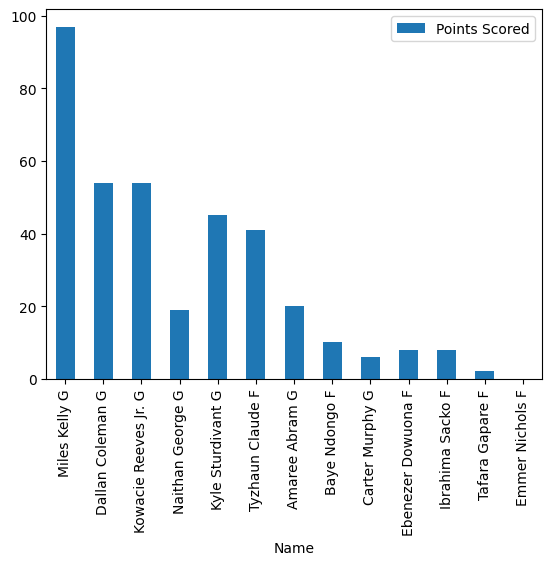

In [10]:
gt_stats_df23.plot(kind='bar', x='Name', y='Points Scored')

# Previous Seasons Data

## 2018-19

In [11]:
url18 = 'https://www.espn.com/mens-college-basketball/team/stats/_/id/59/season/2019'
gt_stats18 = pd.read_html(url18)
gt_stats18

[                   Name
 0       Jose Alvarado G
 1     James Banks III F
 2       Michael Devoe G
 3      Brandon Alston G
 4        Moses Wright F
 5     Abdoulaye Gueye F
 6   Curtis Haywood II G
 7        Khalid Moore F
 8           Evan Cole F
 9    Kristian Sjolund F
 10  Shembari Phillips G
 11  Sylvester Ogbonda F
 12    Shaheed Medlock G
 13        Evan Jester F
 14        Avi Schafer C
 15       Malachi Rice G
 16                Total,
     GP   MIN   PTS   REB   AST  STL  BLK    TO   FG%   FT%   3P%
 0   31  34.3  12.5   3.9   3.4  1.8  0.1   2.1  39.2  74.3  28.6
 1   31  30.3  10.5   7.7   1.4  0.5  2.5   2.3  56.4  68.0   0.0
 2   32  32.3   9.7   3.3   2.5  1.4  0.5   2.3  40.1  71.0  39.3
 3   26  17.6   7.0   1.7   1.0  0.3  0.1   1.4  46.2  83.7  38.9
 4   30  18.5   6.7   3.7   0.8  0.4  0.6   1.1  47.0  48.9  20.8
 5   30  17.3   6.6   3.7   0.8  0.6  0.9   1.3  51.9  59.6  22.2
 6   29  21.7   5.6   2.7   2.0  1.2  0.1   1.4  35.7  76.0  27.6
 7   31  16.4   4.2  

In [12]:
gt_stats_data18 = {
    'Name': gt_stats18[0]['Name'][:-1],
    'Games Played': gt_stats18[1]['GP'][:-1],
    'Points Scored': gt_stats18[3]['PTS'][:-1]
}
gt_stats_df18 = pd.DataFrame(gt_stats_data18)
gt_stats_df18

,Name,Games Played,Points Scored
0,Jose Alvarado G,31,386
1,James Banks III F,31,326
2,Michael Devoe G,32,310
3,Brandon Alston G,26,182
4,Moses Wright F,30,201
5,Abdoulaye Gueye F,30,198
6,Curtis Haywood II G,29,163
7,Khalid Moore F,31,129
8,Evan Cole F,18,74
9,Kristian Sjolund F,21,63


In [34]:
transfers18 = pd.DataFrame({
    'Name': np.intersect1d(gt_stats_df18['Name'], transfer_data.names)
})
transfers18

,Name
0,James Banks III F


<Axes: xlabel='Name'>

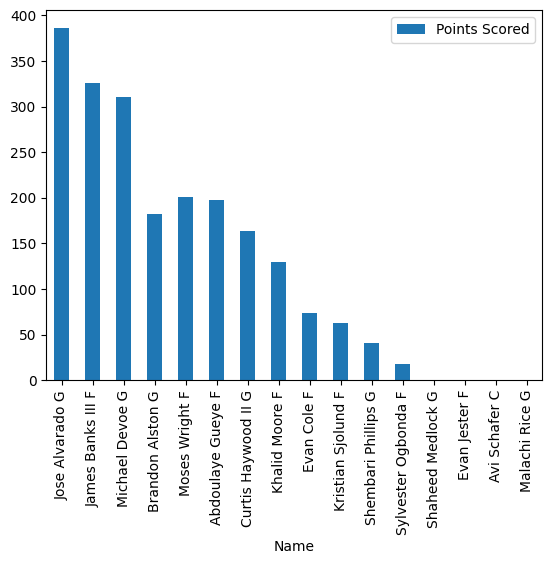

In [13]:
gt_stats_df18.plot(kind='bar', x='Name', y='Points Scored')

## 2019-20

In [14]:
url19 = 'https://www.espn.com/mens-college-basketball/team/stats/_/id/59/season/2020'
gt_stats19 = pd.read_html(url19)
gt_stats19

[                   Name
 0       Michael Devoe G
 1       Jose Alvarado G
 2        Moses Wright F
 3     James Banks III F
 4        Jordan Usher G
 5        Bubba Parham G
 6           Evan Cole F
 7        Khalid Moore F
 8        Asanti Price G
 9       Jehloni James F
 10  Shembari Phillips G
 11       Coleman Boyd G
 12      Niko Broadway G
 13      David Didenko F
 14    Shaheed Medlock G
 15       Malachi Rice G
 16                Total,
     GP   MIN   PTS   REB   AST  STL  BLK    TO    FG%   FT%   3P%
 0   28  35.1  16.0   3.9   3.4  1.2  0.1   3.4   47.6  75.0  42.7
 1   24  33.5  14.4   3.4   4.0  2.2  0.1   2.7   44.4  79.3  33.6
 2   31  30.4  13.0   7.0   0.9  0.6  1.1   2.6   53.1  61.7  24.1
 3   31  29.6   9.5   7.6   1.0  1.0  2.5   2.0   52.5  63.3   0.0
 4   23  26.6   8.2   4.4   2.1  0.8  0.3   2.5   40.4  75.9  20.5
 5   31  26.6   5.2   2.4   1.8  0.8  0.0   1.4   35.8  86.7  30.2
 6   27  12.6   4.4   3.6   0.4  0.3  0.3   0.7   47.1  54.1  19.0
 7   29  17.1

In [15]:
gt_stats_data19 = {
    'Name': gt_stats19[0]['Name'][:-1],
    'Games Played': gt_stats19[1]['GP'][:-1],
    'Points Scored': gt_stats19[3]['PTS'][:-1]
}
gt_stats_df19 = pd.DataFrame(gt_stats_data19)
gt_stats_df19

,Name,Games Played,Points Scored
0,Michael Devoe G,28,448
1,Jose Alvarado G,24,345
2,Moses Wright F,31,403
3,James Banks III F,31,293
4,Jordan Usher G,23,188
5,Bubba Parham G,31,160
6,Evan Cole F,27,120
7,Khalid Moore F,29,95
8,Asanti Price G,15,40
9,Jehloni James F,1,2


In [33]:
transfers19 = pd.DataFrame({
    'Name': np.intersect1d(gt_stats_df19['Name'], transfer_data.names)
})
transfers19

,Name
0,Bubba Parham G
1,James Banks III F
2,Jordan Usher G


<Axes: xlabel='Name'>

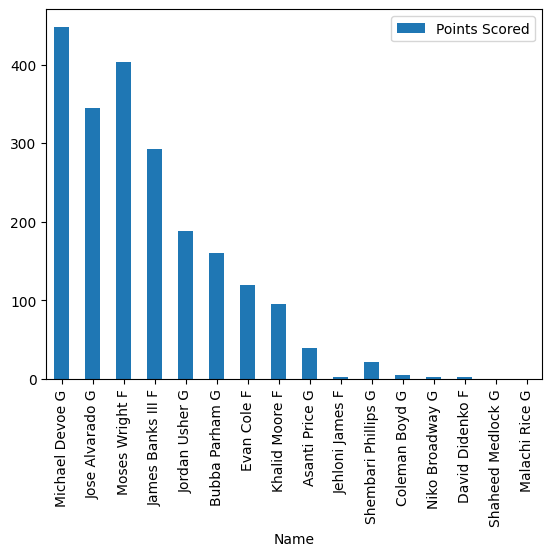

In [16]:
gt_stats_df19.plot(kind='bar', x='Name', y='Points Scored')

## 2020-21

In [17]:
url20 = 'https://www.espn.com/mens-college-basketball/team/stats/_/id/59/season/2021'
gt_stats20 = pd.read_html(url20)
gt_stats20

[                 Name
 0      Moses Wright F
 1     Jose Alvarado G
 2     Michael Devoe G
 3      Jordan Usher G
 4      Bubba Parham G
 5      Khalid Moore F
 6   Kyle Sturdivant G
 7      Malachi Rice G
 8   Tristen Maxwell G
 9     Rodney Howard F
 10  Shaheed Medlock G
 11   Saba Gigiberia C
 12      Jordan Meka F
 13     Coleman Boyd G
 14    David Didenko F
 15    Jehloni James F
 16    Niko Broadway G
 17              Total,
     GP   MIN   PTS   REB   AST  STL  BLK    TO    FG%    FT%   3P%
 0   25  35.3  17.4   8.0   2.3  1.5  1.6   1.6   53.2   65.8  41.4
 1   26  37.1  15.2   3.5   4.1  2.8  0.0   2.0   50.4   83.7  39.0
 2   26  34.9  15.0   4.3   3.3  1.3  0.3   2.6   45.6   75.3  40.0
 3   26  29.5  11.6   4.2   2.8  1.6  0.7   2.2   50.0   66.7  28.6
 4   25  26.9   6.7   2.6   1.4  1.0  0.0   0.5   41.0   81.5  33.0
 5   25  23.9   4.8   3.0   0.8  0.7  0.5   0.8   38.0   63.4  22.6
 6   26  11.9   3.5   0.9   1.0  0.2  0.1   0.7   43.2   78.3  36.4
 7    1   2.0   3.

In [18]:
gt_stats_data20 = {
    'Name': gt_stats20[0]['Name'][:-1],
    'Games Played': gt_stats20[1]['GP'][:-1],
    'Points Scored': gt_stats20[3]['PTS'][:-1]
}
gt_stats_df20 = pd.DataFrame(gt_stats_data20)
gt_stats_df20

,Name,Games Played,Points Scored
0,Moses Wright F,25,435
1,Jose Alvarado G,26,395
2,Michael Devoe G,26,391
3,Jordan Usher G,26,302
4,Bubba Parham G,25,167
5,Khalid Moore F,25,120
6,Kyle Sturdivant G,26,90
7,Malachi Rice G,1,3
8,Tristen Maxwell G,1,3
9,Rodney Howard F,19,31


In [35]:
transfers20 = pd.DataFrame({
    'Name': np.intersect1d(gt_stats_df20['Name'], transfer_data.names)
})
transfers20

,Name
0,Bubba Parham G
1,Jordan Usher G
2,Kyle Sturdivant G
3,Rodney Howard F


<Axes: xlabel='Name'>

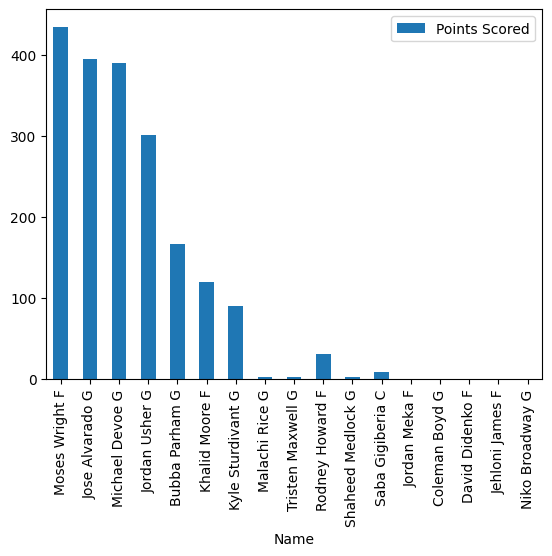

In [19]:
gt_stats_df20.plot(kind='bar', x='Name', y='Points Scored')

## 2021-22

In [20]:
url21 = 'https://www.espn.com/mens-college-basketball/team/stats/_/id/59/season/2022'
gt_stats21 = pd.read_html(url21)
gt_stats21

[                 Name
 0     Michael Devoe G
 1      Jordan Usher G
 2   Kyle Sturdivant G
 3     Rodney Howard F
 4   Tristen Maxwell G
 5    Dallan Coleman G
 6      Deivon Smith G
 7      Khalid Moore F
 8       Miles Kelly G
 9       Jalon Moore F
 10   Saba Gigiberia C
 11      Jordan Meka F
 12     Bubba Parham G
 13     Coleman Boyd G
 14  Brayden Daniels G
 15              Total,
     GP   MIN   PTS   REB   AST  STL  BLK    TO   FG%   FT%   3P%
 0   31  34.5  17.9   4.9   3.1  1.4  0.4   2.8  46.2  73.3  36.5
 1   32  31.7  14.8   6.5   2.9  1.5  0.2   2.7  47.8  72.2  34.2
 2   32  25.2   7.6   2.5   2.3  0.9  0.1   1.2  41.2  78.0  33.3
 3   27  24.8   6.5   5.1   1.5  0.4  0.7   1.5  56.1  61.4   0.0
 4    5  15.6   6.4   1.6   0.4  0.2  0.0   0.6  34.4  50.0  40.0
 5   31  23.5   6.2   1.9   0.6  0.9  0.1   0.7  39.1  71.9  41.3
 6   24  19.7   5.7   3.4   2.0  1.0  0.2   1.8  40.3  59.3  27.8
 7   32  23.9   5.2   3.4   0.7  1.1  0.2   1.1  40.9  68.0  21.4
 8   30  14.6 

In [21]:
gt_stats_data21 = {
    'Name': gt_stats21[0]['Name'][:-1],
    'Games Played': gt_stats21[1]['GP'][:-1],
    'Points Scored': gt_stats21[3]['PTS'][:-1]
}
gt_stats_df21 = pd.DataFrame(gt_stats_data21)
gt_stats_df21

,Name,Games Played,Points Scored
0,Michael Devoe G,31,555
1,Jordan Usher G,32,473
2,Kyle Sturdivant G,32,243
3,Rodney Howard F,27,175
4,Tristen Maxwell G,5,32
5,Dallan Coleman G,31,192
6,Deivon Smith G,24,137
7,Khalid Moore F,32,166
8,Miles Kelly G,30,135
9,Jalon Moore F,13,37


In [36]:
transfers21 = pd.DataFrame({
    'Name': np.intersect1d(gt_stats_df21['Name'], transfer_data.names)
})
transfers21

,Name
0,Bubba Parham G
1,Deivon Smith G
2,Jordan Usher G
3,Kyle Sturdivant G
4,Rodney Howard F


<Axes: xlabel='Name'>

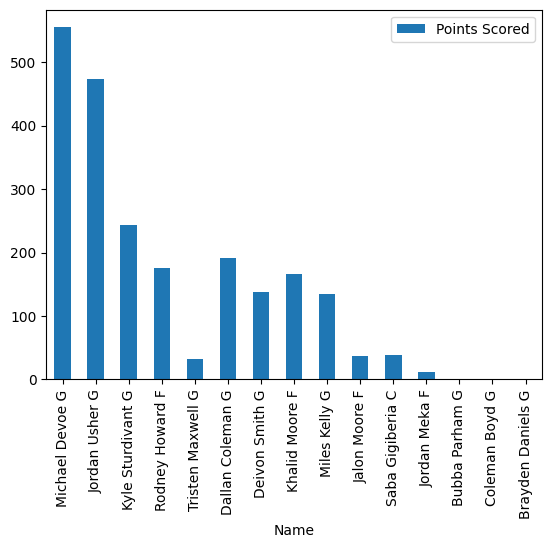

In [22]:
gt_stats_df21.plot(kind='bar', x='Name', y='Points Scored')

## 2022-23

In [23]:
url22 = 'https://www.espn.com/mens-college-basketball/team/stats/_/id/59/season/2023'
gt_stats22 = pd.read_html(url22)
gt_stats22

[                       Name
 0             Miles Kelly G
 1             Lance Terry G
 2         Ja'von Franklin F
 3          Dallan Coleman G
 4         Kyle Sturdivant G
 5            Deivon Smith G
 6             Jalon Moore F
 7           Rodney Howard F
 8         Tristen Maxwell G
 9   Freds Pauls Bagatskis F
 10         Cyril Martynov C
 11           Coleman Boyd G
 12            Jordan Meka F
 13         Jermontae Hill G
 14        Brayden Daniels G
 15                    Total,
     GP   MIN   PTS   REB   AST  STL  BLK    TO    FG%   FT%   3P%
 0   33  32.4  14.4   3.4   1.3  0.7  0.1   1.5   41.0  89.8  37.9
 1   29  29.6  10.1   2.8   1.2  0.6  0.2   0.9   42.1  81.4  38.8
 2   32  27.3   9.7   8.1   2.2  1.4  1.6   1.3   59.1  65.1   0.0
 3   33  31.2   9.5   2.9   1.3  0.8  0.3   1.2   37.6  68.9  32.6
 4   33  23.9   8.6   2.3   3.3  0.7  0.1   1.6   39.3  69.5  32.1
 5   24  24.8   8.0   5.6   3.7  0.9  0.7   1.3   39.9  44.8  26.1
 6   32  20.5   7.6   4.7   0.8  0.7 

In [24]:
gt_stats_data22 = {
    'Name': gt_stats22[0]['Name'][:-1],
    'Games Played': gt_stats22[1]['GP'][:-1],
    'Points Scored': gt_stats22[3]['PTS'][:-1]
}
gt_stats_df22 = pd.DataFrame(gt_stats_data22)
gt_stats_df22

,Name,Games Played,Points Scored
0,Miles Kelly G,33,476
1,Lance Terry G,29,294
2,Ja'von Franklin F,32,310
3,Dallan Coleman G,33,314
4,Kyle Sturdivant G,33,283
5,Deivon Smith G,24,191
6,Jalon Moore F,32,244
7,Rodney Howard F,24,107
8,Tristen Maxwell G,18,60
9,Freds Pauls Bagatskis F,9,8


In [37]:
transfers22 = pd.DataFrame({
    'Name': np.intersect1d(gt_stats_df22['Name'], transfer_data.names)
})
transfers22

,Name
0,Deivon Smith G
1,Ja'von Franklin F
2,Kyle Sturdivant G
3,Lance Terry G
4,Rodney Howard F


<Axes: xlabel='Name'>

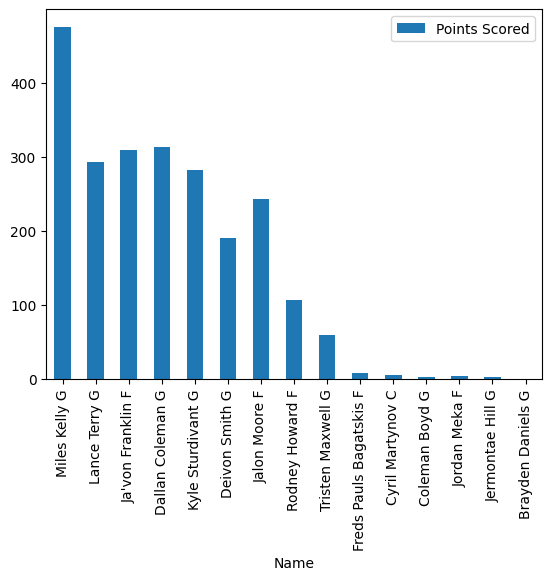

In [25]:
gt_stats_df22.plot(kind='bar', x='Name', y='Points Scored')